<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Описание" data-toc-modified-id="Описание-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Описание</a></span></li><li><span><a href="#Задачи" data-toc-modified-id="Задачи-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Задачи</a></span></li></ul></li><li><span><a href="#Подключение-библиотек,-выгрузка-и-осмотр-данных" data-toc-modified-id="Подключение-библиотек,-выгрузка-и-осмотр-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подключение библиотек, выгрузка и осмотр данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Итог" data-toc-modified-id="Итог-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Итог</a></span></li></ul></li><li><span><a href="#Исследование" data-toc-modified-id="Исследование-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование</a></span><ul class="toc-item"><li><span><a href="#Сколько-клиентов-в-пиццерии-каждый-день?-Есть-ли-часы-пик?" data-toc-modified-id="Сколько-клиентов-в-пиццерии-каждый-день?-Есть-ли-часы-пик?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сколько клиентов в пиццерии каждый день? Есть ли часы пик?</a></span></li><li><span><a href="#Сколько-пицц-обычно-находится-в-заказе?-Есть-ли-бестселлеры?" data-toc-modified-id="Сколько-пицц-обычно-находится-в-заказе?-Есть-ли-бестселлеры?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Сколько пицц обычно находится в заказе? Есть ли бестселлеры?</a></span></li><li><span><a href="#Сколько-денег-пиццерия-заработала-в-этом-году?-Можем-ли-выявить-какую-либо-сезонность-в-продажах?" data-toc-modified-id="Сколько-денег-пиццерия-заработала-в-этом-году?-Можем-ли-выявить-какую-либо-сезонность-в-продажах?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Сколько денег пиццерия заработала в этом году? Можем ли выявить какую-либо сезонность в продажах?</a></span></li><li><span><a href="#Итог" data-toc-modified-id="Итог-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Итог</a></span></li></ul></li><li><span><a href="#Гипотезы" data-toc-modified-id="Гипотезы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Гипотезы</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-1" data-toc-modified-id="Гипотеза-1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Гипотеза 1</a></span></li><li><span><a href="#Гипотеза-2" data-toc-modified-id="Гипотеза-2-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Гипотеза 2</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Пет проект 

### Описание

Объем продаж вымышленной пиццерии за год, включая дату и время каждого заказа и подаваемую пиццу, а также дополнительные сведения о типе, размере, количестве, цене и ингредиентах.



### Задачи

1)Подключение библиотек, выгрузка, осмотр данных

2)Подготовка,предобработка данных

3)Провести исследование

3.1) Сколько клиентов в пиццерии каждый день? Есть ли часы пик?

3.2) Сколько пицц обычно находится в заказе? Есть ли бестселлеры?

3.3) Сколько денег пиццерия заработала в этом году? Можем ли выявить какую-либо сезонность в продажах?

3.4) Рекомендации

4)Гипотезы

4.1)Средние пиццы в выходные берут чаще чем в будние дни

4.2)В будни дни заказы пиццы размера M и L равны


## Подключение библиотек, выгрузка и осмотр данных

In [277]:
import pandas as pd
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt
import numpy as np
import math as mth
from scipy import stats as st

In [278]:
order_details = pd.read_csv('/MyJypiterNotebook/Pet_Projects/Pizza/order_details.csv')
order = pd.read_csv('/MyJypiterNotebook/Pet_Projects/Pizza/orders.csv')
pizza_types = pd.read_csv('/MyJypiterNotebook/Pet_Projects/Pizza/pizza_types.csv',header= 0,
                        encoding= 'unicode_escape')
pizzas = pd.read_csv('/MyJypiterNotebook/Pet_Projects/Pizza/pizzas.csv')

In [279]:
order_details.head(5)

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [280]:
order.head(5)

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [281]:
pizza_types.head(5)

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [282]:
pizzas.head(5)

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


Подключил библиотеки, и вывел данные на экран

## Предобработка данных

In [283]:
def info(data):
    ''' 
    функция для предварительной обработки датасетов
    '''
    
    print("Дубликатов обнаружено: ", data.duplicated().sum())
    if data.duplicated().sum() >0:
        print('Обнаружены дубликаты, произвожу очистку')
        data = data.drop_duplicates()
        print('Дубликаты ',data.duplicated().sum())
    print()
    print('Пропусков обнаружено:', data.isna().sum())
    print()
    data.info()
    return data

In [284]:
order_details = info(order_details)

Дубликатов обнаружено:  0

Пропусков обнаружено: order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [285]:
order = info(order)

Дубликатов обнаружено:  0

Пропусков обнаружено: order_id    0
date        0
time        0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [286]:
pizza_types = info(pizza_types)

Дубликатов обнаружено:  0

Пропусков обнаружено: pizza_type_id    0
name             0
category         0
ingredients      0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [287]:
pizzas = info(pizzas)

Дубликатов обнаружено:  0

Пропусков обнаружено: pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [288]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


Привожу к нужному формату и добавляю необходимые для дальнейшей работы колонки

In [289]:
order.date = pd.to_datetime(order.date)
order['weekday'] = pd.to_datetime(order.date).dt.dayofweek
order.time = pd.to_datetime(order.time)
order.time = order.time.round('H')-timedelta(hours = 1)
order.time = order.time.apply(lambda x:x.time())
order.time = order.time.astype(str)

In [290]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  object        
 3   weekday   21350 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 667.3+ KB


Создаю полную таблицу

In [291]:
complete_table = order_details.merge(order,how = 'inner', on = 'order_id')
complete_table = complete_table.merge(pizzas,how = 'inner', on = 'pizza_id')
complete_table = complete_table.merge(pizza_types, how = 'inner', on = 'pizza_type_id')
complete_table['weekday'] = pd.to_datetime(complete_table.date).dt.dayofweek
complete_table['day_name'] = pd.to_datetime(complete_table.date).dt.day_name()
complete_table['month'] = pd.to_datetime(complete_table.date).dt.month
complete_table['month_name'] = pd.to_datetime(complete_table.date).dt.month_name()
complete_table.head(5)

,order_details_id,order_id,pizza_id,quantity,date,time,weekday,pizza_type_id,size,price,name,category,ingredients,day_name,month,month_name
0,1,1,hawaiian_m,1,2015-01-01,11:00:00,3,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,1,January
1,179,77,hawaiian_m,1,2015-01-02,11:00:00,4,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Friday,1,January
2,357,146,hawaiian_m,1,2015-01-03,13:00:00,5,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,1,January
3,389,163,hawaiian_m,1,2015-01-03,16:00:00,5,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,1,January
4,568,247,hawaiian_m,1,2015-01-04,20:00:00,6,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Sunday,1,January


### Итог

Проверил таблицы на пропуски и дубликаты, изменил тип данных и добавил нужный столбец для дальнейшей работы, создал объединённую таблицу

## Исследование

### Сколько клиентов в пиццерии каждый день? Есть ли часы пик?

In [292]:
complete_table.groupby('date', as_index=False).agg({'order_id':'count'}).order_id.mean()

135.81005586592178

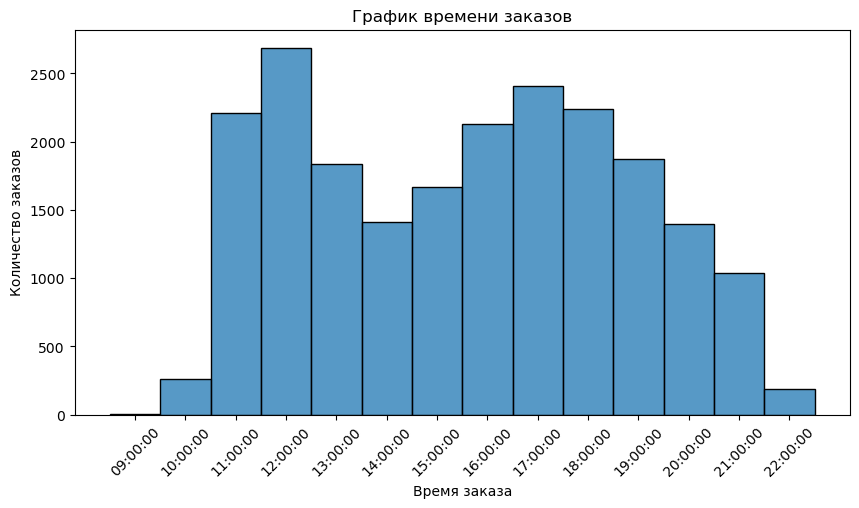

In [293]:
plt.figure(figsize = (10,5))
sns.histplot(order.time.sort_values())
plt.xticks(rotation = 45)
plt.title('График времени заказов')
plt.xlabel('Время заказа')
plt.ylabel('Количество заказов')
plt.show()

Тут наблюдаю что пик активности около 12 часов и ближе к вечеру с 16 часов до 19

### Сколько пицц обычно находится в заказе? Есть ли бестселлеры?

In [294]:
pizz_in_order =complete_table.groupby('order_id',as_index=False).agg({'quantity':'sum'})

Строю график заказов

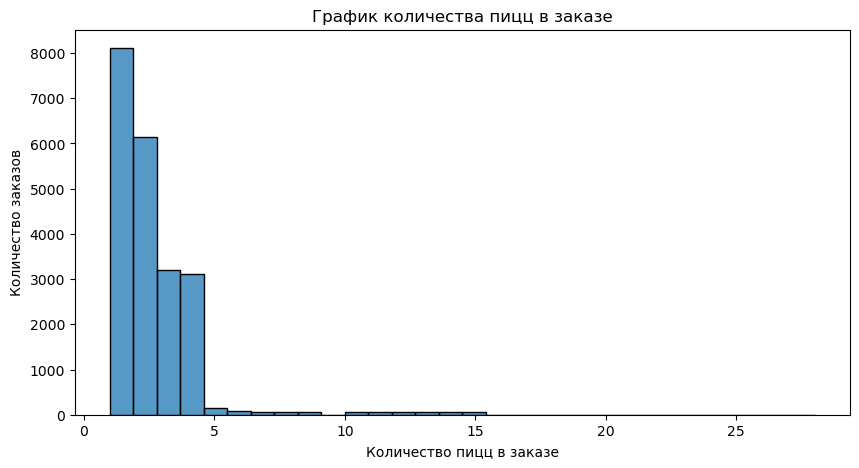

In [295]:
plt.figure(figsize=(10,5))
sns.histplot(pizz_in_order,x = 'quantity',bins=30)
plt.xlabel('Количество пицц в заказе')
plt.ylabel('Количество заказов')
plt.title('График количества пицц в заказе')
plt.show()

Тут вижу что в большей части заказов входит от одной до 5 пицц, но есть длинный хвост

In [296]:
percentile97 = round(np.percentile(pizz_in_order.quantity,97))
print(percentile97,' и более пицц лишь в 3% заказов')

5  и более пицц лишь в 3% заказов


In [297]:
print('Если убрать выброс то в среднем в заказе ', round(pizz_in_order.query('quantity < @percentile97').quantity.mean(),2),'пицц')

Если убрать выброс то в среднем в заказе  2.07 пицц


In [298]:
top_15 = complete_table.name.value_counts().head(15)
top_15 = top_15.reset_index().rename(columns={'index':'name','name':'count'})
top_15


,name,count
0,The Classic Deluxe Pizza,2416
1,The Barbecue Chicken Pizza,2372
2,The Hawaiian Pizza,2370
3,The Pepperoni Pizza,2369
4,The Thai Chicken Pizza,2315
5,The California Chicken Pizza,2302
6,The Sicilian Pizza,1887
7,The Spicy Italian Pizza,1887
8,The Southwest Chicken Pizza,1885
9,The Four Cheese Pizza,1850


Смотрю какие размеры пицц предпочитают клиенты

In [299]:
complete_table.groupby('size').agg({'order_id':'count'}).reset_index().rename(columns={'order_id':'order_count'})

,size,order_count
0,L,18526
1,M,15385
2,S,14137
3,XL,544
4,XXL,28


Большинство клиентов предпочитают большие пиццы, так же берут среднии и маленькие. Пиццы размера XL и XXL практически не берут

Тут Я отбираю топ 15 пицц и из них 6 примерно равны по популярности 

### Сколько денег пиццерия заработала в этом году? Можем ли выявить какую-либо сезонность в продажах?

In [300]:
print('Пиццерия в этом году заработала: ', complete_table.price.sum())

Пиццерия в этом году заработала:  801944.7


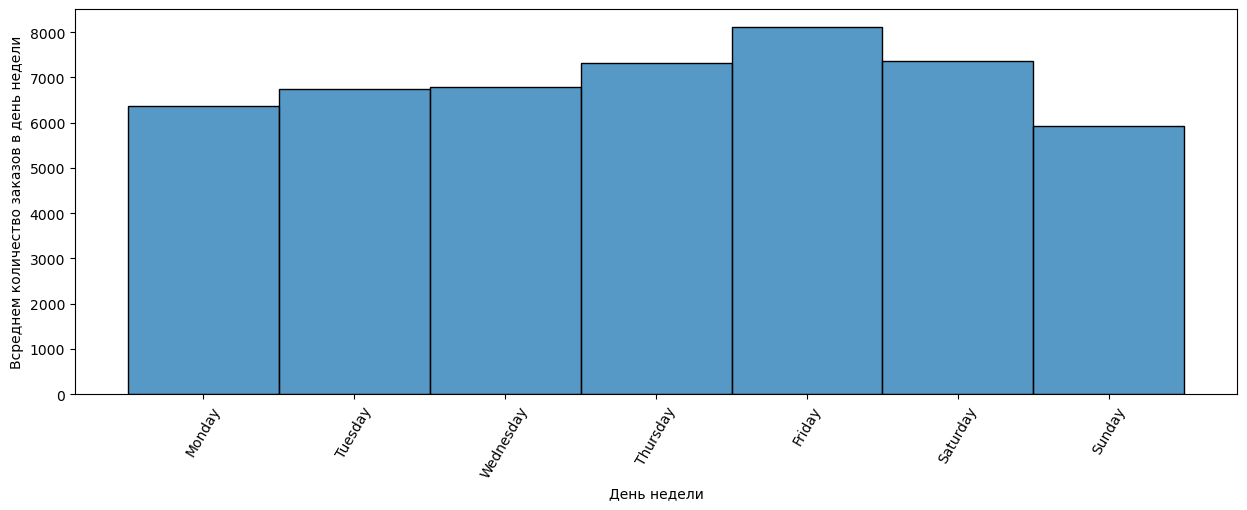

In [301]:
plt.figure(figsize=(15,5))
sns.histplot(complete_table.sort_values(by = 'weekday'),x = 'day_name')
plt.xticks(rotation=60)
plt.ylabel('Всреднем количество заказов в день недели')
plt.xlabel('День недели')
plt.show()

Заказы нарастают в течении недели, больше всего их в пятницу затем идёт спад, меньше всего заказов в воскресенье

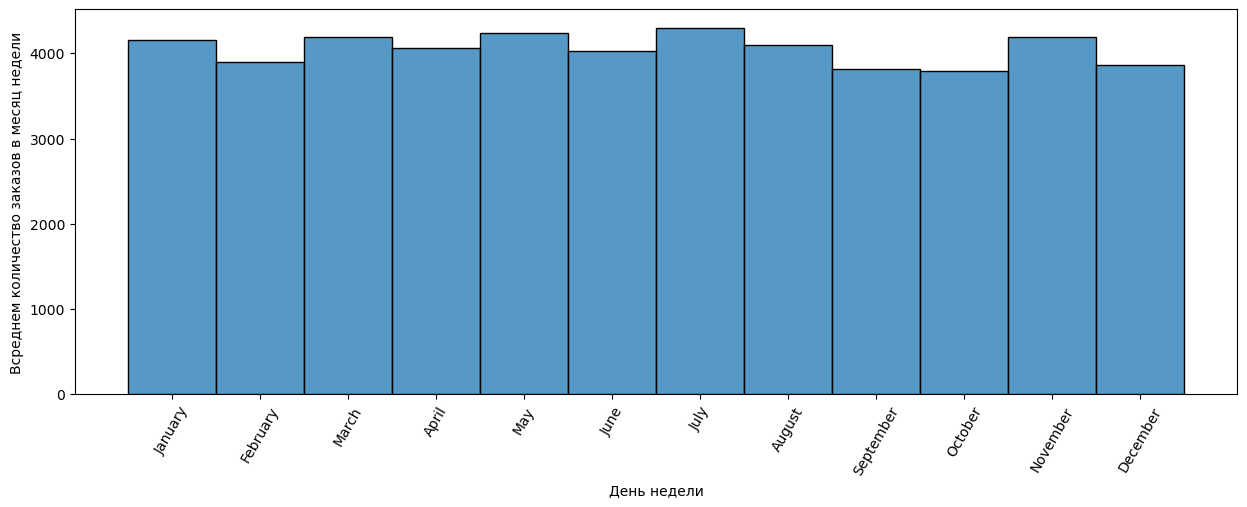

In [302]:
plt.figure(figsize=(15,5))
sns.histplot(complete_table.sort_values(by = 'month'),x = 'month_name')
plt.xticks(rotation=60)
plt.ylabel('Всреднем количество заказов в месяц недели')
plt.xlabel('День недели')
plt.show()

Разницы в заказах по месяцам не значительные

### Итог

1)В день в среднем приходят 135 человек

2)Пики активности приходятся на 12 часов, и с 16-19 часов

3)Большинство заказов на 1 пиццу, а среднее по заказам ~2, больше 4‐х практически не берут

4)Большинство клиентов предпочитают большие пиццы, так же берут средние и маленькие. Пиццы размера XL и XXL практически не берут

5)Есть 6 самых популярных пицц - Classic Deluxe Pizza, Barbecue Chicken Pizza, Hawaiian Pizza, Pepperoni Pizza, Thai Chicken Pizza, California Chicken Pizza. Количество покупок данных пицц практически не различается

6)Заказы нарастают в течение недели, больше всего их в пятницу затем идёт спад, меньше всего заказов в воскресенье

## Гипотезы

### Гипотеза 1

H_0 Большие пиццы в выходные берут так же часто как и в будние дни

H_1 Количество в заказах больших пицц различается в выходные и будни

In [303]:
def ztest(data_one,second_data):
    alpha = 0.01
    p1 = data_one[0]/second_data[0]
    p2 = data_one[1]/second_data[1]
    
    p_combined = (data_one[0]+data_one[1])/(second_data[0]+second_data[1])
    
    difference = p1-p2
    
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/second_data[0] + 1/second_data[1]))
    
    distr = st.norm(0,1)
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 

In [304]:
pizza_l = complete_table.query('size == "L"')

In [305]:
weekendstr = [5,6]
weekdays = complete_table.query('weekday not in @weekendstr')
weekend = complete_table.query('weekday in @weekendstr')

In [306]:
count_pizz =[weekend.query('size == "L"').quantity.count(),weekdays.query('size == "L"').quantity.count()]
count_orders = [weekend.order_id.count(),weekdays.order_id.count()]

In [307]:
ztest(count_pizz,count_orders)

p-значение:  0.006797178125890202
Отвергаем нулевую гипотезу: между долями есть значимая разница


### Гипотеза 2

H_0 В будни дни заказы пиццы размера M и L равны

H_1 В будни дни заказы пиццы размера M и L не равны

In [308]:
count_pizz = [weekdays.query('size == "M"').quantity.count(),weekdays.query('size == "L"').quantity.count()]
count_orders = [weekdays.order_id.count(),weekdays.order_id.count()]

In [309]:
ztest(count_pizz,count_orders)

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


## Общий вывод

Мной были предобработаны данные и проведено исследование.
Я выяснил что:

1)В день в среднем приходят 135 человек

2)Пики активности приходятся на 12 часов, и с 16-19 часов

3)Большинство заказов на 1 пиццу, а среднее по заказам ~2, больше 4‐х практически не берут

4)Большинство клиентов предпочитают большие пиццы, так же берут средние и маленькие. Пиццы размера XL и XXL практически не берут

5)Есть 6 самых популярных пицц - Classic Deluxe Pizza, Barbecue Chicken Pizza, Hawaiian Pizza, Pepperoni Pizza, Thai Chicken Pizza, California Chicken Pizza. Количество покупок данных пицц практически не различается

6)Заказы нарастают в течение недели, больше всего их в пятницу затем идёт спад, меньше всего заказов в воскресенье

7)Гипотезу, что большую пиццу берут в будни так же часто как и в выходные была отвергнута так как есть статистическая разница

8)Гипотезу, что в будние дни пиццы размера М и L берут одинокого была отвергнута так как есть статистическая разница

Рекомендации:

Для повышения среднего чека я бы посоветовал добавить возможность менять немного пиццы как пример добавить сырный/сосисочный борт, различные топинги

Для возможности получать статистику по посетителям я бы предложил сделать аккаунты/карточки пользователей и для повышения retention бонусные балы и дополнительные акции например каждая 10 бесплатна